<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Clase5/blob/main/AprendizajeNoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 1: Introducción al Aprendizaje No Supervisado

En Machine Learning, distinguimos entre diferentes paradigmas de aprendizaje. Hemos visto el aprendizaje supervisado, donde un modelo aprende a partir de datos que incluyen tanto las características de entrada como las "etiquetas" o respuestas correctas (ej: clasificar un email como spam o no spam).

### ¿Qué es el Aprendizaje No Supervisado?

El **aprendizaje no supervisado** es fundamentalmente diferente. Su objetivo principal es encontrar patrones, estructuras y relaciones ocultas en los datos **sin la necesidad de etiquetas o respuestas predefinidas**. Es como darle a un niño un conjunto de juguetes sin decirle cómo se llaman o cómo agruparlos, y esperar que el niño descubra similitudes y los organice por sí mismo.

Como dijo el científico de la computación Yann LeCun: *"si la inteligencia fuera un pastel, el aprendizaje no supervisado sería el pastel, el aprendizaje supervisado sería el glaseado del pastel, y el aprendizaje por refuerzo sería la cereza del pastel."* Esta analogía subraya la creencia de que el aprendizaje no supervisado es la base más grande y con mayor potencial para la inteligencia artificial. La vasta mayoría de los datos disponibles en el mundo real no están etiquetados, y el aprendizaje no supervisado nos permite extraer valor de esta inmensa cantidad de información.

### Aplicaciones Clave del Aprendizaje No Supervisado

El aprendizaje no supervisado es increíblemente versátil y tiene aplicaciones en diversas áreas:

1.  **Agrupamiento (Clustering):**
    * **Propósito:** Organizar datos en grupos o "clústeres" de manera que los elementos dentro del mismo clúster sean más similares entre sí que con los elementos de otros clústeres.
    * **Ejemplos:**
        * Segmentación de clientes: Agrupar clientes por sus patrones de compra para estrategias de marketing personalizadas.
        * Agrupación de documentos: Clasificar artículos de noticias o correos electrónicos por temas.
        * Biología: Identificar diferentes tipos de células o proteínas basándose en sus características genéticas.


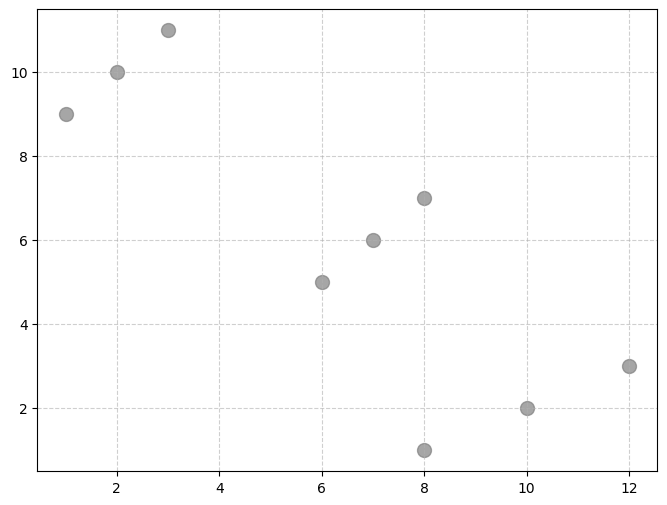

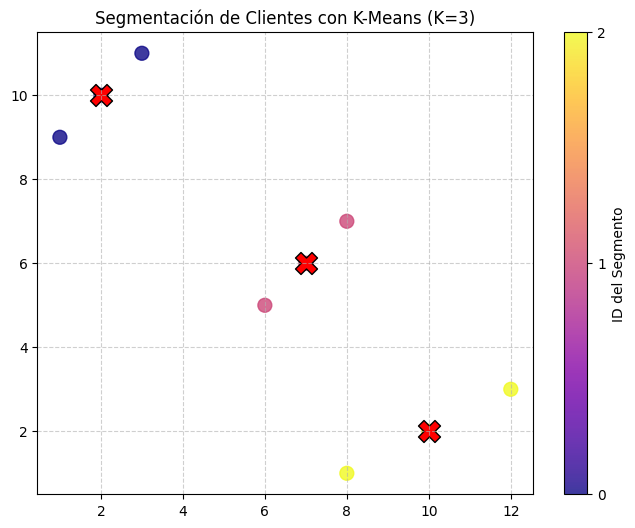

Resultados de la segmentación:
Cliente 1: Segmento 2
Cliente 2: Segmento 2
Cliente 3: Segmento 2
Cliente 4: Segmento 0
Cliente 5: Segmento 0
Cliente 6: Segmento 0
Cliente 7: Segmento 1
Cliente 8: Segmento 1
Cliente 9: Segmento 1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Datos de ejemplo: [gasto_lacteos, gasto_frutas]
# Estos datos no tienen etiquetas, el algoritmo debe encontrar los grupos
X_clientes = np.array([
    [10, 2], [12, 3], [8, 1], # Clúster 1: Compradores de lácteos
    [2, 10], [3, 11], [1, 9], # Clúster 2: Compradores de frutas
    [7, 6], [8, 7], [6, 5]    # Clúster 3: Compradores balanceados
])

plt.figure(figsize=(8, 6))
plt.scatter(X_clientes[:, 0], X_clientes[:, 1], s=100, c='gray', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Aplicar K-Means para encontrar 3 grupos
# n_init='auto' es el valor por defecto en versiones recientes de scikit-learn
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_clientes)
labels_clientes = kmeans.labels_
centroids_clientes = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_clientes[:, 0], X_clientes[:, 1], c=labels_clientes, cmap='plasma', s=100, alpha=0.8)
plt.scatter(centroids_clientes[:, 0], centroids_clientes[:, 1], marker='X', s=250, c='red', edgecolor='black', label='Centroides')
plt.title("Segmentación de Clientes con K-Means (K=3)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.colorbar(scatter, ticks=[0, 1, 2], label='ID del Segmento')
plt.show()

print("Resultados de la segmentación:")
for i, label in enumerate(labels_clientes):
    print(f"Cliente {i+1}: Segmento {label}")


2.  **Reducción de Dimensiones:**
    * **Propósito:** Como vimos en la Clase 1, reducir el número de características de un dataset, manteniendo la información más importante.
    * **Ejemplos:**
        * Compresión de datos: Reducir el tamaño de los archivos sin perder información crítica.
        * Visualización: Proyectar datos de alta dimensión a 2D o 3D para facilitar el análisis visual.
        * Preprocesamiento: Eliminar ruido o características redundantes para mejorar el rendimiento de otros algoritmos.


Dimensiones originales de las imágenes de dígitos: 64 características por imagen.
Número de muestras cargadas: 901


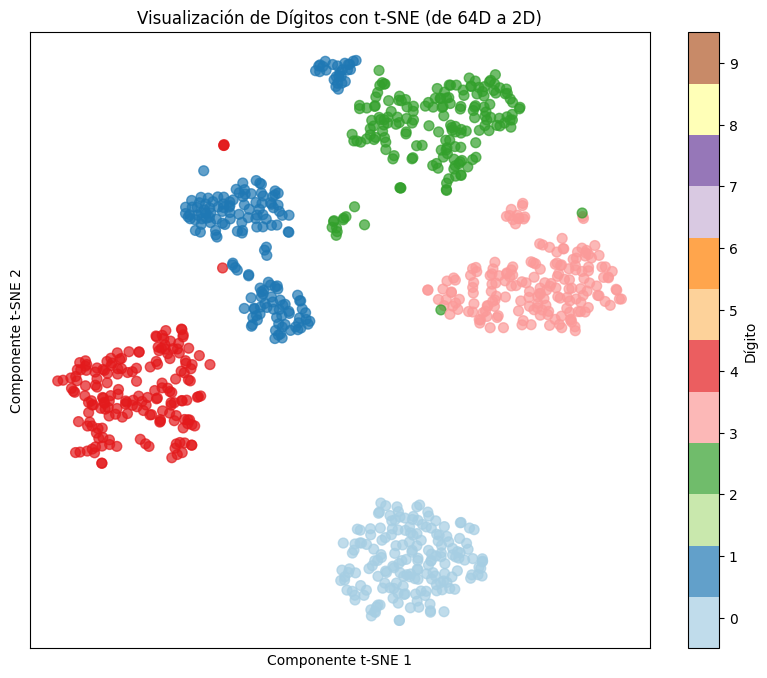


El gráfico de t-SNE muestra que incluso desde 64 dimensiones, los dígitos
se agrupan en clústeres bien separados en 2D. t-SNE es excelente para visualizar
estructuras complejas y no lineales en datos de alta dimensión, a diferencia de PCA.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE # t-SNE
from sklearn.preprocessing import StandardScaler

# Cargar un subconjunto del dataset MNIST (dígitos)
# Cada imagen tiene 8x8 = 64 características (píxeles)
digits = load_digits(n_class=5) # Cargamos solo 5 clases para agilizar
X_digits = digits.data
y_digits = digits.target # Usamos las etiquetas solo para colorear el gráfico final, t-SNE no las usa.

print(f"Dimensiones originales de las imágenes de dígitos: {X_digits.shape[1]} características por imagen.")
print(f"Número de muestras cargadas: {X_digits.shape[0]}")

# Escalar los datos es una buena práctica para t-SNE también
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# Aplicar t-SNE para reducir a 2 dimensiones
# El learning_rate es importante y puede necesitar ajuste
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random') # init='random' para simplicidad
X_digits_tsne = tsne.fit_transform(X_digits_scaled)

plt.figure(figsize=(10, 8))
# Colorear los puntos según su etiqueta verdadera para ver cómo t-SNE los separa
scatter = plt.scatter(X_digits_tsne[:, 0], X_digits_tsne[:, 1], c=y_digits, cmap='Paired', s=50, alpha=0.7)
plt.title("Visualización de Dígitos con t-SNE (de 64D a 2D)")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.colorbar(scatter, ticks=np.arange(len(digits.target_names)), label='Dígito')
plt.clim(-0.5, len(digits.target_names) - 0.5)
plt.xticks([])
plt.yticks([])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nEl gráfico de t-SNE muestra que incluso desde 64 dimensiones, los dígitos")
print("se agrupan en clústeres bien separados en 2D. t-SNE es excelente para visualizar")
print("estructuras complejas y no lineales en datos de alta dimensión, a diferencia de PCA.")


3.  **Detección de Anomalías / Novedades:**
    * **Propósito:** Identificar instancias inusuales o "outliers" que se desvían significativamente del patrón normal de los datos.
    * **Diferencia sutil:**
        * **Detección de Anomalías:** Se entrena el modelo con datos que *pueden* contener algunas anomalías, y el objetivo es señalarlas.
        * **Detección de Novedades:** El modelo se entrena en un conjunto de datos "limpio" (se asume que no contiene anomalías), y luego se utiliza para detectar "novedades" o instancias que son significativamente diferentes de lo que el modelo ha aprendido como "normal".
    * **Ejemplos:** Detección de fraude en transacciones bancarias, monitorización de fallos en equipos industriales, detección de ciberataques, identificación de enfermedades raras.


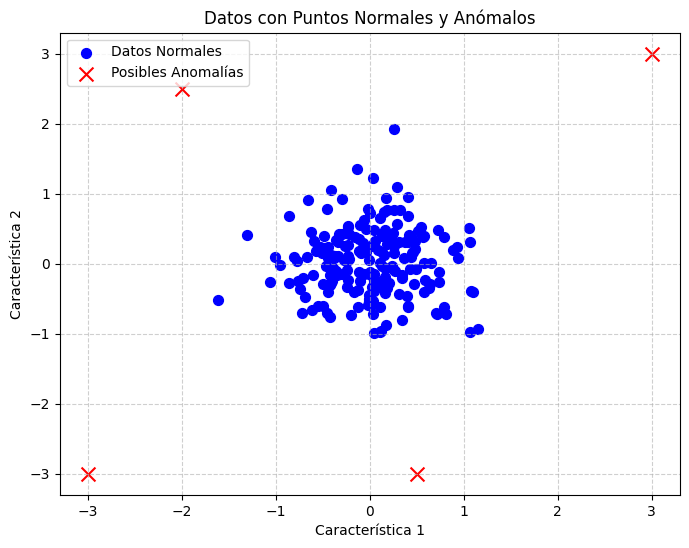

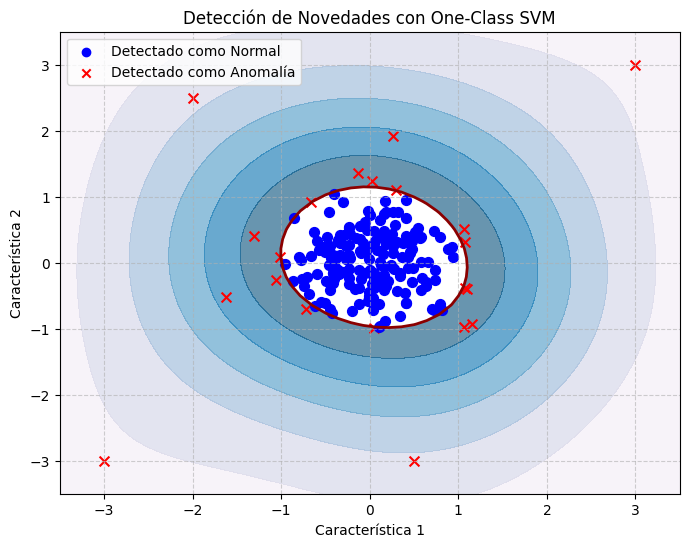


En este gráfico, la zona azul clara representa la región donde el modelo considera que los datos son 'normales'.
La línea roja oscura es el límite de decisión que separa los puntos normales de los anómalos.
Los puntos marcados con 'x' roja son aquellos que el One-Class SVM ha clasificado como anomalías,
lo que coincide con los puntos que generamos lejos del clúster principal.
Este es un ejemplo claro de cómo el aprendizaje no supervisado puede detectar comportamientos inusuales.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs # Para generar datos de ejemplo
from sklearn.preprocessing import StandardScaler

# Generar datos "normales" (la mayoría de los puntos)
X_normal, _ = make_blobs(n_samples=200, centers=[[0, 0]], cluster_std=0.5, random_state=42)

# Añadir algunos puntos "anómalos" (outliers)
X_outliers = np.array([[3, 3], [-2, 2.5], [0.5, -3], [-3, -3]])

X_data = np.vstack([X_normal, X_outliers]) # Combinar normales y anómalos

plt.figure(figsize=(8, 6))
plt.scatter(X_normal[:, 0], X_normal[:, 1], c='blue', s=50, label='Datos Normales')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', marker='x', s=100, label='Posibles Anomalías')
plt.title("Datos con Puntos Normales y Anómalos")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# Entrenar un One-Class SVM
# El parámetro 'nu' es la fracción esperada de anomalías (típicamente entre 0 y 1)
# 'kernel' especifica el tipo de kernel, 'rbf' es común para no linealidad
oc_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1) # Asumimos 10% de anomalías
oc_svm.fit(X_scaled)

# Predecir qué puntos son normales (1) y cuáles son anomalías (-1)
y_pred = oc_svm.predict(X_scaled)

# Invertir la escala para la visualización si es necesario, o visualizar directamente con los escalados
# Para este caso, vamos a visualizar con los datos originales para claridad
colors = np.array(['blue', 'red'])
# Mapear predicciones a colores: 1 (normal) -> azul, -1 (anomalía) -> rojo
plot_colors = [colors[0] if p == 1 else colors[1] for p in y_pred]
markers = np.array(['o', 'x'])
plot_markers = [markers[0] if p == 1 else markers[1] for p in y_pred]

plt.figure(figsize=(8, 6))
# Dibujar el "límite de decisión" de la anomalía
xx, yy = np.meshgrid(np.linspace(X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5, 50),
                     np.linspace(X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5, 50))
Z = oc_svm.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.6)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

for i in range(len(X_data)):
    plt.scatter(X_data[i, 0], X_data[i, 1], c=plot_colors[i], marker=plot_markers[i], s=50)

plt.title("Detección de Novedades con One-Class SVM")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.scatter([], [], c='blue', marker='o', label='Detectado como Normal')
plt.scatter([], [], c='red', marker='x', label='Detectado como Anomalía')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nEn este gráfico, la zona azul clara representa la región donde el modelo considera que los datos son 'normales'.")
print("La línea roja oscura es el límite de decisión que separa los puntos normales de los anómalos.")
print("Los puntos marcados con 'x' roja son aquellos que el One-Class SVM ha clasificado como anomalías,")
print("lo que coincide con los puntos que generamos lejos del clúster principal.")
print("Este es un ejemplo claro de cómo el aprendizaje no supervisado puede detectar comportamientos inusuales.")


4.  **Minado de Reglas de Asociación:**
    * **Propósito:** Descubrir relaciones y co-ocurrencias frecuentes entre variables en grandes bases de datos.
    * **Ejemplo:** En el análisis de cesta de la compra, encontrar reglas como "los clientes que compran pan y leche, también tienden a comprar mantequilla".



5.  **Modelado de Temas (Topic Modeling):**
    * **Propósito:** Extraer los "temas" principales o latentes de grandes colecciones de documentos de texto.
    * **Ejemplo:** Analizar un corpus de artículos de noticias para identificar temas como "economía", "política", "deportes", etc., sin tener etiquetas previas.



### ¿Por qué es Crucial el Aprendizaje No Supervisado?

El aprendizaje no supervisado es crucial porque:
* **Abundancia de Datos No Etiquetados:** La mayoría de los datos generados en el mundo son no etiquetados. Etiquetar datos manualmente es costoso, lento y a menudo inviable a gran escala.
* **Descubrimiento de Conocimiento:** Permite descubrir patrones, correlaciones y estructuras que no eran evidentes y que pueden generar nuevas hipótesis o ideas de negocio.
* **Mejora de Otros Modelos:** Los resultados del aprendizaje no supervisado (como clústeres o características reducidas) pueden usarse como entrada para modelos supervisados, mejorando su rendimiento.

En las siguientes clases, profundizaremos en algoritmos específicos como K-Means, que nos permitirán ver el aprendizaje no supervisado en acción.